# mount google drive

In [133]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# set working directory

In [4]:
import os
os.chdir("/home/michael/gitrepos/CC0325/codes/matmat/")

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import seaborn as sns
# set theme, white background
sns.set_theme(style="whitegrid")

In [6]:
def plot_polynomial_fit(df, column_name, column_values, degree=2):
    # Fit a polynomial to the data
    coefficients = np.polyfit(df[column_name], df[column_values], degree)
    poly = np.poly1d(coefficients)

    # Show the polynomial fit equation
    x = sp.Symbol('x')
    poly_equation = sp.Poly(poly(x), x)
    print(f"Polynomial Fit Equation: {poly_equation}")

    # Plot the data points
    sns.scatterplot(data=df, x=column_name, y=column_values, marker='o', label='Data Points')

    # Plot the polynomial fit, dashed line
    sns.lineplot(data=df, x=column_name, y=poly(df[column_name]), label='Poly Fit', linestyle='--')

    plt.legend()
    plt.show()


In [8]:
!make clean
!make run

# read the output file
df = pd.read_csv('output.csv')
df.head()

,MatrixSize,BlockSize,Time(s),Speedup
0,128,1,0.008659,1.0
1,256,1,0.082999,1.0
2,384,1,0.200375,1.0
3,512,1,0.992520,1.0
4,640,1,0.975894,1.0


Polynomial Fit Equation: Poly(5.85671843422782e-8*x**3 - 7.65472700718467e-5*x**2 + 0.0310298007167656*x - 3.23892815999997, x, domain='RR')


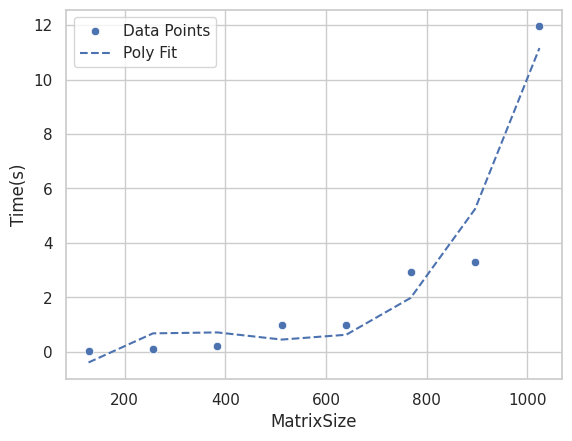

In [10]:
df_filtered = df[df['BlockSize'] == 1]
plot_polynomial_fit(df_filtered, 'MatrixSize', 'Time(s)', degree=3)

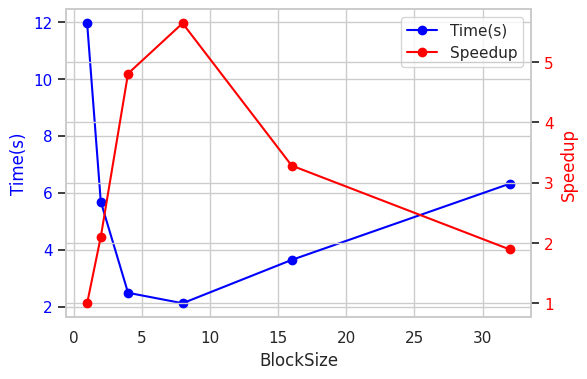

In [26]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot Time(s) on primary axis (blue)
ax1.plot(df_filtered['BlockSize'], df_filtered['Time(s)'], marker='o', color='blue', label='Time(s)')
ax1.set_xlabel('BlockSize')
ax1.set_ylabel('Time(s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis (red) and plot Speedup
ax2 = ax1.twinx()
ax2.plot(df_filtered['BlockSize'], df_filtered['Speedup'], marker='o', color='red', label='Speedup')
ax2.set_ylabel('Speedup', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()